In [113]:
import tweepy
import pandas as pd
import numpy as np
import json
import time
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image
import random


%matplotlib inline

## Gather data

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
archive[archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [358]:
consumer_key = ''    #insert value
consumer_secret = '' #insert value
access_token = ''    #insert value
access_secret = ''   #insert value

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [359]:
sample_id = archive['tweet_id']

In [289]:
#sample_id = archive['tweet_id'].sample(100)

In [271]:
#sample_id = [780092040432480260]

In [360]:
sample_id.shape

(2356,)

In [361]:
start_time = time.time()

errors = []
df_list = []
count = 0

for one_id in sample_id:
    count += 1
    try:
        tweet = api.get_status(one_id, tweet_mode='extended')
        tweet_json = tweet._json
        if count % 10 == 0:
            print('{}. ID {} and time elapsed {:0.3f} secs'.format(count, one_id, time.time()-start_time))
        
        with open('tweet_json.txt','a') as outfile:
            json.dump(tweet_json, outfile)
            outfile.write('\n')
            
    except Exception as e:
        errors.append([one_id,e])
        if len(errors) == 100:
            break
        continue
        

10. ID 890240255349198849 and time elapsed 4.964 secs
30. ID 886366144734445568 and time elapsed 14.887 secs
40. ID 884876753390489601 and time elapsed 19.850 secs
50. ID 882762694511734784 and time elapsed 24.814 secs
60. ID 880872448815771648 and time elapsed 29.842 secs
70. ID 879050749262655488 and time elapsed 34.802 secs
80. ID 877556246731214848 and time elapsed 39.967 secs
90. ID 875021211251597312 and time elapsed 45.021 secs
100. ID 872967104147763200 and time elapsed 50.951 secs
110. ID 871166179821445120 and time elapsed 55.886 secs
120. ID 869772420881756160 and time elapsed 60.895 secs
130. ID 867421006826221569 and time elapsed 65.844 secs
140. ID 865359393868664832 and time elapsed 70.895 secs
150. ID 863079547188785154 and time elapsed 75.798 secs
160. ID 860981674716409858 and time elapsed 80.836 secs
170. ID 859196978902773760 and time elapsed 85.780 secs
180. ID 857214891891077121 and time elapsed 90.772 secs
190. ID 855860136149123072 and time elapsed 95.752 secs
2

Rate limit reached. Sleeping for: 442


1460. ID 695064344191721472 and time elapsed 1191.726 secs
1470. ID 694183373896572928 and time elapsed 1196.715 secs
1480. ID 693582294167244802 and time elapsed 1201.642 secs
1490. ID 692905862751522816 and time elapsed 1206.586 secs
1500. ID 692187005137076224 and time elapsed 1211.443 secs
1510. ID 691459709405118465 and time elapsed 1216.429 secs
1520. ID 690735892932222976 and time elapsed 1221.485 secs
1530. ID 690248561355657216 and time elapsed 1226.605 secs
1540. ID 689661964914655233 and time elapsed 1231.503 secs
1550. ID 689255633275777024 and time elapsed 1236.629 secs
1560. ID 688547210804498433 and time elapsed 1241.544 secs
1570. ID 687807801670897665 and time elapsed 1246.553 secs
1580. ID 687312378585812992 and time elapsed 1251.417 secs
1590. ID 686683045143953408 and time elapsed 1259.291 secs
1600. ID 686034024800862208 and time elapsed 1264.399 secs
1610. ID 685547936038666240 and time elapsed 1269.332 secs
1620. ID 684959798585110529 and time elapsed 1274.409 se

Rate limit reached. Sleeping for: 445


In [362]:
print(errors)

[[888202515573088257, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [873697596434513921, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [872668790621863937, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [872261713294495745, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [869988702071779329, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [866816280283807744, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [861769973181624320, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [856602993587888130, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [851953902622658560, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [845459076796616705, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)], [844704788403113984, TweepError([{'code

In [363]:
len(errors)

21

### Loading the downloaded file with all tweets as JSON each in its own line

In [4]:
archive_data = []

with open('tweet_json.txt') as json_file:  
    for line in json_file:
        archive_data.append(json.loads(line))

In [5]:
len(archive_data)

2335

In [7]:
# To be run together with twitter API call to check if statuses for all twitter IDs where received
len(sample_id)-len(archive_data)-len(errors)

In [40]:
df_list = []

for item in archive_data:
    try:
        dog_pic = item['entities']['media'][0]['media_url']
    except:
        try:
            dog_pic = item['retweeted_status']['entities']['media'][0]['media_url']
        except:
            dog_pic = 'None'

    try:    
        text = item['full_text']
    except:    
        text = 'None'

    try:    
        tweet_url = item['entities']['media'][0]['expanded_url']
    except:
        try:
            tweet_url = return_json['retweeted_status']['entities']['media'][0]['expanded_url']
        except:
            tweet_url = 'None'

    try:    
        fav_count = item['favorite_count']
        assert fav_count > 0
    except AssertionError:
        fav_count = item['retweeted_status']['favorite_count']
    except Exception:    
        fav_count = 'None'

    try:    
        retwt_count = item['retweet_count']
    except:
        retwt_count = 'None'

    try:    
        retwt_status_id = item['retweeted_status']['id']
    except:
        retwt_status_id = 'None'

    

    df_list.append({'tweet_id': item['id'],
                    'text_check': text,
                    'dog_picture_url': dog_pic,
                    'tweet_web_url' : tweet_url,
                    'favourite_count': fav_count,
                    'retweet_count': retwt_count,
                    'retweet_status_id_api': retwt_status_id})

df = pd.DataFrame(df_list, columns = ['tweet_id', 'text_check', 'dog_picture_url', 'tweet_web_url', 
                                      'favourite_count', 'retweet_count', 'retweet_status_id_api'])

In [41]:
df.head()

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434,8138,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164,6029,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251,3991,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,40731,8304,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,38968,8992,None


In [42]:
df[df.duplicated()]

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api


In [336]:
#df = df[~df.duplicated()]

In [43]:
sum(df.duplicated())

0

In [44]:
df[df.dog_picture_url == 'None']

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,https://twitter.com/dog_rates/status/830583320...,116,4,None
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,https://twitter.com/dog_rates/status/830583320...,1501,105,886053734421102592
34,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,https://twitter.com/dog_rates/status/830583320...,19777,3596,None
41,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,None,https://twitter.com/dog_rates/status/830583320...,70538,19726,None
54,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,None,https://twitter.com/dog_rates/status/830583320...,123,7,None
63,879674319642796034,@RealKentMurphy 14/10 confirmed,None,https://twitter.com/dog_rates/status/830583320...,302,10,None
71,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,None,https://twitter.com/dog_rates/status/830583320...,29243,6937,None
82,876537666061221889,I can say with the pupmost confidence that the...,None,https://twitter.com/dog_rates/status/830583320...,22835,4481,None
87,875097192612077568,You'll get your package when that precious man...,None,https://twitter.com/dog_rates/status/830583320...,26593,5853,None
106,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,None,https://twitter.com/dog_rates/status/830583320...,20392,5380,None


In [45]:
df[df.retweet_status_id_api == 'None'].count()

tweet_id                 2170
text_check               2170
dog_picture_url          2170
tweet_web_url            2170
favourite_count          2170
retweet_count            2170
retweet_status_id_api    2170
dtype: int64

In [46]:
df[df.tweet_web_url == 'None']

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api


In [47]:
df.favourite_count.sort_values()

1275        51
329         68
2318        75
2277        82
2298        99
2316        99
2330       103
2306       103
2325       108
2321       110
1060       112
29         116
109        118
2304       118
2299       119
2332       120
54         123
2333       124
2329       129
2323       140
2314       141
279        145
2168       146
2319       148
2320       158
2302       159
2300       160
2307       161
2278       163
2315       167
         ...  
90       51583
851      51617
158      51617
607      52483
444      54263
290      54263
380      54364
351      55110
7        63112
118      64097
22       66651
343      69411
35       69411
41       70538
148      73557
37       74829
1809     76676
76       77148
521      78945
111      80792
1745     81065
162      89278
431      90844
434      90844
65      102479
1059    119452
129     120097
518     124911
398     137875
1019    161664
Name: favourite_count, Length: 2335, dtype: int64

In [48]:
df[df.favourite_count == 'None']

C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api


In [49]:
df[df.retweet_count == 'None']

C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api


In [50]:
df[df.text_check == 'None']

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api


In [51]:
# code to call a JSON for a scpecific tweet ID
for item in archive_data:
    if item['id'] == 885311592912609280:
        return_json = item
return_json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jul 13 01:35:06 +0000 2017',
 'display_text_range': [0, 133],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/SATN4If5H5',
    'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1',
    'id': 830583314243268608,
    'id_str': '830583314243268608',
    'indices': [110, 133],
    'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 1536},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 900},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 830583320585068544,
    'source_status_id_str': '830583320585068544',
    'source_user_id': 4196983835,
    'source_user_id_str': '4196983835',
    'type': 'photo',
    'url': 'https://t.co/SATN4If5H5'}],
  'symbo

In [53]:
# code to call first tweet that has a non null retweet_status
for item in archive_data:
    try:
        if item['retweeted_status']['id']:
            return_json = item
        break
    except:
        continue
return_json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jul 15 02:45:48 +0000 2017',
 'display_text_range': [0, 50],
 'entities': {'hashtags': [{'indices': [21, 26], 'text': 'BATP'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/dog_rates/stat…',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'indices': [27, 50],
    'url': 'https://t.co/WxwJmvjfxo'}],
  'user_mentions': [{'id': 19607400,
    'id_str': '19607400',
    'indices': [3, 13],
    'name': "Oakland A's",
    'screen_name': 'Athletics'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo',
 'geo': None,
 'id': 886054160059072513,
 'id_str': '886054160059072513',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'und',
 'place': None,
 'possibly_sensitive': False,


In [56]:
return_json['retweeted_status']['id']

886053734421102592

In [389]:
#shutil.copy('tweet_json.txt', 'tweet_json_mastercopy.txt')

'tweet_json_mastercopy.txt'

In [58]:
df.to_csv('twitter_status_dogs.csv',index=False)

In [3]:
#download image classification results table
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_class = pd.read_csv(url, sep='\t')
df_class.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
df_class.shape

(2075, 12)

In [5]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_class.to_csv('twitter_image_class.csv',index=False)

In [11]:
#this is the output file required for the project, not later used
df_class.to_csv('image_predictions.tsv',sep='\t',index=False)

## Data clean

In [12]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [13]:
df_class = pd.read_csv('twitter_image_class.csv')
df_class.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [14]:
df_status = pd.read_csv('twitter_status_dogs.csv')
df_status.head(3)

,tweet_id,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434,8138,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164,6029,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251,3991,None


In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
tweet_id                 2335 non-null int64
text_check               2335 non-null object
dog_picture_url          2335 non-null object
tweet_web_url            2335 non-null object
favourite_count          2335 non-null int64
retweet_count            2335 non-null int64
retweet_status_id_api    2335 non-null object
dtypes: int64(3), object(4)
memory usage: 127.8+ KB


In [18]:
all_columns = pd.Series(list(df_archive) + list(df_class) + list(df_status))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Good that names of columns are not duplicated apart from tweet_id on which the tables can be joined;  but there are actually duplicating contents in several columns (eg text in `df_archive` and text_check in `df_status` )

### Tidying/Cleaning

  - joining `df_archive` and `df_status`, which can sit in one table (following cleaning), complying with tidyness protocol; also once they do, it will be easier to examine the following
  - creating `class_df` from `df_class`
  - dropping rows that have no *favourite_rating* and *retween_count* (this is because those tweets were deleted, and where  subsequntly not received from Twitter API
  - checking tweet text is correct for each tweet (comparing two columns that store tweet text, deciding which to keep),
  - similarly checking other potentially duplicated columns, including tweet_url (columns `expanded_urls` and `tweet_web_url`) and retweet_id (columns `retweeted_status_id` and `retween_status_id_api`)
  - converting the `retweeted_status_id` column to integer (np.int64), in line with tweet_id
  - checking ratings (`rating_numerator` and `rating_denominator`) are correctly imported to ratings columns (from tweet text)
  - creating one column for 'dog_stages' (from the four "dummy" columns of `doggo`, `floofer`, `pupper`, `puppo`)
  - checking 'dog stages' are all correctly extracted
  - convert timestamp from string to datetime
  - identifying and dropping rows that are retweets (explicitly not required to be included in the project)
  - checking other cleanliness issues (e.g. ` dog_picture_url` in df_tweet should be the same as `jpg_url` in df_class; check and drop one)
  - renaming columns in `class_clean`
  
It seems that the image classification table `class_clean` (previously `df_class`) could also be joined without causing tidyness issues, that said, since it is such a different "unit" of information, with its own independent source (ie classification model output), will keep it separate for now.

In [19]:
# create TWEET_CLEAN from df_archive and df_status
tweet_clean = pd.merge(df_archive, df_status,
                            on=['tweet_id'], how='left')

#create CLASS_CLEAN from df_class
class_clean = df_class

In [20]:
tweet_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,This is Tilly. She's just checking pup on you....,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251.0,3991.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,None,None,This is Darla. She commenced a snooze mid meal...,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,40731.0,8304.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,This is Franklin. He would like you to stop ca...,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,38968.0,8992.0,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,Here we have a majestic great white breaching ...,http://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://twitter.com/dog_rates/status/891087950...,19575.0,2985.0,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,None,None,None,None,Meet Jax. He enjoys ice cream so much he gets ...,http://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://twitter.com/dog_rates/status/890971913...,11437.0,1979.0,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,When you watch your owner call another dog a g...,http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,https://twitter.com/dog_rates/status/890729181...,63112.0,18106.0,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,None,None,None,None,This is Zoey. She doesn't want to be one of th...,http://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://twitter.com/dog_rates/status/890609185...,26940.0,4098.0,None
9,890

In [21]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
text_check                    23

#### Dropping rows that have no favourite_rating and retween_count (this is because those tweets were deleted, and where subsequntly not received from Twitter API

In [22]:
tweet_clean = tweet_clean[tweet_clean.favourite_count.notnull()]

In [23]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      2335 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2335 non-null object
source                        2335 non-null object
text                          2335 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2276 non-null object
rating_numerator              2335 non-null int64
rating_denominator            2335 non-null int64
name                          2335 non-null object
doggo                         2335 non-null object
floofer                       2335 non-null object
pupper                        2335 non-null object
puppo                         2335 non-null object
text_check                    23

In [24]:
tweet_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,text_check,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,...,None,None,None,None,This is Rizzy. She smiles a lot. 12/10 contagi...,http://pbs.twimg.com/media/CvT6IV3WgAA4Dht.jpg,https://twitter.com/dog_rates/status/789530877...,12413.0,3639.0,None
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,...,None,None,None,None,Here's a couple rufferees making sure all the ...,http://pbs.twimg.com/media/Crc9DElWcAQrPkj.jpg,https://twitter.com/dog_rates/status/772152991...,3966.0,1190.0,None
345,831939777352105988,NaN,NaN,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,...,doggo,None,None,None,This is Emanuel. He's a h*ckin rare doggo. Dwe...,http://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,https://twitter.com/dog_rates/status/831939777...,24865.0,6477.0,None
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680161097...,...,None,None,None,None,Meet Goliath. He's an example of irony. Head i...,http://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,https://twitter.com/dog_rates/status/680161097...,2392.0,772.0,None
1067,740676976021798912,NaN,NaN,2016-06-08 22:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740676976...,...,None,None,pupper,None,"Meet Baloo. He's expecting a fast ground ball,...",http://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,https://twitter.com/dog_rates/status/740676976...,18726.0,7114.0,None


In [25]:
#few checks to see values are sensible
tweet_clean.favourite_count.sort_values().head(5)

1295    51.0
342     68.0
2339    75.0
2298    82.0
2319    99.0
Name: favourite_count, dtype: float64

In [26]:
tweet_clean.favourite_count.sort_values().tail(5)

1079    119452.0
135     120097.0
534     124911.0
413     137875.0
1039    161664.0
Name: favourite_count, dtype: float64

In [27]:
tweet_clean.retweet_count.sort_values().head(5)

291     1.0
342     2.0
1295    2.0
274     2.0
113     3.0
Name: retweet_count, dtype: float64

In [28]:
tweet_clean.retweet_count.sort_values().tail(5)

66      42651.0
413     46757.0
534     59854.0
1079    60745.0
1039    82098.0
Name: retweet_count, dtype: float64

#### Checking tweet text is correct for each tweet (comparing two columns that store tweet text, deciding which to keep)

In [29]:
sum(tweet_clean.text != tweet_clean.text_check)

0

Ok, marvelous, all text from tweets was downloaded correctly;
therefore can just drop one of the text columns, will drop `text_check`

In [30]:
tweet_clean.drop(columns=['text_check'], axis=1, inplace=True)

C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
tweet_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,None


#### Similarly checking other potentially duplicated columns, including tweet_url (columns `expanded_urls` and `tweet_web_url`) and retweet_id (columns `retweeted_status_id` and  `retween_status_id_api`)

In [32]:
sum(tweet_clean.expanded_urls != tweet_clean.tweet_web_url)

852

Hm, not such a great match..

In [33]:
tweet_clean[tweet_clean.expanded_urls != tweet_clean.tweet_web_url][['expanded_urls','tweet_web_url']]

,expanded_urls,tweet_web_url
4,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...
6,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://twitter.com/dog_rates/status/890971913...
7,https://twitter.com/dog_rates/status/890729181...,https://twitter.com/dog_rates/status/890729181...
10,https://twitter.com/dog_rates/status/890006608...,https://twitter.com/dog_rates/status/890006608...
13,https://twitter.com/dog_rates/status/889638837...,https://twitter.com/dog_rates/status/889638837...
17,https://twitter.com/dog_rates/status/888804989...,https://twitter.com/dog_rates/status/888804989...
18,https://twitter.com/dog_rates/status/888554962...,https://twitter.com/dog_rates/status/888554962...
20,https://twitter.com/dog_rates/status/888078434...,https://twitter.com/dog_rates/status/888078434...
23,https://twitter.com/dog_rates/status/887473957...,https://twitter.com/dog_rates/status/887473957...
26,https://twitter.com/dog_rates/status/886983233...,https://twitter.com/dog_rates/status/886983233...


In [34]:
tweet_clean[tweet_clean.expanded_urls != tweet_clean.tweet_web_url].loc[2209,['expanded_urls','tweet_web_url']].values

array(['https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1',
       'https://twitter.com/dog_rates/status/668623201287675904/photo/1'],
      dtype=object)

Ok, seems that `tweet_web_url` is more complete and also devoid of repetitions/multiple entries (unlike `expanded_urls` column); threrefore will drop `expanded_urls` column

In [35]:
tweet_clean.drop(columns=['expanded_urls'], axis=1, inplace=True)

C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
tweet_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,name,doggo,floofer,pupper,puppo,dog_picture_url,tweet_web_url,favourite_count,retweet_count,retweet_status_id_api
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,...,Phineas,None,None,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,...,Tilly,None,None,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,None


#### Now checking for duplications in retweet_id (columns `retweeted_status_id` and  `retween_status_id_api`)

In [37]:
#normalising for NaN and 'None'
tweet_clean.retweet_status_id_api[tweet_clean.retweet_status_id_api == 'None'] = np.nan

C:\Users\vilij\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\vilij\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
sum(tweet_clean.retweet_status_id_api == 'None')

0

In [39]:
sum(tweet_clean.retweet_status_id_api.isnull())

2170

In [40]:
#Ok, now let's compare the two columns
tweet_clean[tweet_clean.retweeted_status_id != tweet_clean.retweet_status_id_api][['retweeted_status_id','retweet_status_id_api']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 2 columns):
retweeted_status_id      165 non-null float64
retweet_status_id_api    165 non-null object
dtypes: float64(1), object(1)
memory usage: 54.7+ KB


In [41]:
#ok, for comparison let's try to use `retweet_status_id_api` values as float (also NaNs are accomodated for that way)
sum(tweet_clean.retweeted_status_id == tweet_clean.retweet_status_id_api.astype(float))

165

In [42]:
temp = tweet_clean.retweet_status_id_api.astype(float)
temp2 = tweet_clean.retweeted_status_id
sum(temp[temp.notnull()] != temp2[temp2.notnull()])

0

#### Ok, so in conclusion, the `retweeted_status_id`  and `retweet_status_id_api` are the same; therefore I will drop the `retweet_status_id_api` column

In [43]:
tweet_clean.drop(columns=['retweet_status_id_api'], axis=1, inplace=True)

C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
tweet_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_picture_url,tweet_web_url,favourite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251.0,3991.0


#### For completeness with the `retweeted_status_id` column, will also convert it to integer (np.int64), in line with tweet_id
To deal with NaNs I will first convert all NaNs to 0s, then the column to int64

In [45]:
tweet_clean.retweeted_status_id[tweet_clean.retweeted_status_id.isnull()] = 0
tweet_clean.retweeted_status_id = tweet_clean.retweeted_status_id.astype(np.int64)
#tweet_clean.retweeted_status_id[tweet_clean.retweeted_status_id == 0] = np.nan

C:\Users\vilij\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vilij\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\vilij\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C

In [46]:
tweet_clean.retweeted_status_id.dtype

dtype('int64')

#### Checking ratings are correctly imported to ratings columns (from tweet text)

In [47]:
tweet_clean.loc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [48]:
test = tweet_clean.text.str.extract(r'(\d{1,4}[\.]?[\d{1,2}]?)([\s]?[/][\s]?)(\d{2,4})',expand = True)
test

,0,1,2
0,13,/,10
1,13,/,10
2,12,/,10
3,13,/,10
4,12,/,10
5,13,/,10
6,13,/,10
7,13,/,10
8,13,/,10
9,14,/,10


In [49]:
sum(test[0].isnull())

1

In [50]:
#let's check where NaNs are coming from
test = test.join(tweet_clean['text'], how='left')
test.to_csv('test.csv')

In [51]:
tweet_clean.rating_numerator.value_counts()

12      554
11      464
10      459
13      340
9       157
8       102
7        55
14       51
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [52]:
test[0].value_counts()

12      554
11      464
10      459
13      340
9       158
8       102
7        54
14       51
5        35
6        32
3        19
4        17
2         9
1         8
75        2
420       2
0         2
15        2
84        1
45        1
60        1
144       1
204       1
80        1
44        1
20        1
17        1
121       1
960       1
27        1
26        1
9.5       1
99        1
143       1
1776      1
182       1
50        1
165       1
007       1
88        1
666       1
13.5      1
Name: 0, dtype: int64

In [53]:
tweet_clean.rating_denominator.value_counts()

10     2313
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [54]:
test[2].value_counts()

10     2314
50        3
20        2
80        2
11        2
00        1
16        1
170       1
150       1
120       1
90        1
130       1
110       1
40        1
70        1
15        1
Name: 2, dtype: int64

#### Overall quality of extratction looks good (check in CSV for exceptions, because it's much easier to see full text there); 
It seems that the really high values in denominator and occosationally numerator eg 1776 or 960 are actually valid ratings, and may be in some cases ratings of multiple of dogs in one picture.  Evcen 0 in denominator is a valid number, which was given twice, what it seems not to dogs but to random picture sent to @dog_rates. One real exception was that code reads 9.75 as 75.
For now, will not delete any extreme values, because they're valid, will deal with these in visuals/analysis as relevant.

#### Therefore will now attach new ratings to `tweet_clean` dataframe, to carry out comparison between existings ratings there and newly extracted ratings, and to drop or keep columns accordingly.

In [55]:
test.columns

Index([0, 1, 2, 'text'], dtype='object')

In [56]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_picture_url',
       'tweet_web_url', 'favourite_count', 'retweet_count'],
      dtype='object')

In [57]:
#drop uncenessary columns from test dataframe
test.drop(columns=[1,'text'], axis = 1, inplace=True)

#rename columns
test.rename(columns={0:'rating_numerator_alt',2:'rating_denominator_alt'}, inplace=True)

#join test to tweet_clean
tweet_clean = tweet_clean.join(test, how='left')

In [58]:
tweet_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,doggo,floofer,pupper,puppo,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator_alt,rating_denominator_alt
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,NaN,NaN,13,...,None,None,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,NaN,NaN,13,...,None,None,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,13,10


In [59]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2335 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2335 non-null object
source                        2335 non-null object
text                          2335 non-null object
retweeted_status_id           2335 non-null int64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
rating_numerator              2335 non-null int64
rating_denominator            2335 non-null int64
name                          2335 non-null object
doggo                         2335 non-null object
floofer                       2335 non-null object
pupper                        2335 non-null object
puppo                         2335 non-null object
dog_picture_url               2335 non-null object
tweet_web_url                 233

#### In order to do the comparison between existing ratings numerator and denominator columns (`rating_numerator` and `rating_denominator`) and newly extracted ones, we will need to convert both to float -- there were some ratings (e.g. 13.5/10) that were not intergers, so I decided to follow this rule

In [60]:
sum(tweet_clean.rating_numerator.astype(float) != tweet_clean.rating_numerator_alt.astype(float))

4

In [61]:
print(tweet_clean[tweet_clean.rating_numerator.astype(float) != tweet_clean.rating_numerator_alt.astype(float)]['text'].values)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']


In [62]:
tweet_clean[tweet_clean.rating_numerator.astype(float) != tweet_clean.rating_numerator_alt.astype(float)][['rating_numerator','rating_numerator_alt']]

,rating_numerator,rating_numerator_alt
45,5,13.5
516,24,NaN
1689,5,9.5
2335,1,9


#### Conclusion:
Newly extraceted ratings numerators (in column `rating_numerator_alt`) are the accurate ones for these 4 instances of mismatch

In [63]:
sum(tweet_clean.rating_denominator.astype(float) != tweet_clean.rating_denominator_alt.astype(float))

2

In [64]:
print(tweet_clean[tweet_clean.rating_denominator.astype(float) != tweet_clean.rating_denominator_alt.astype(float)]['text'].values)

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']


In [65]:
tweet_clean[tweet_clean.rating_denominator.astype(float) != tweet_clean.rating_denominator_alt.astype(float)][['rating_denominator','rating_denominator_alt']]

,rating_denominator,rating_denominator_alt
516,7,NaN
2335,2,10


#### Conclusion:
Newly extraceted ratings denominators (in column `rating_denominator_alt`) are the accurate ones for these 2 instances of mismatch

#### ACTION:
Drop existing ratings columns and replace them with newly extracted ratings columns.

In [66]:
tweet_clean.drop(columns=['rating_numerator','rating_denominator'], axis=1, inplace=True)
tweet_clean.rename(columns={'rating_numerator_alt':'rating_numerator','rating_denominator_alt':'rating_denominator'}, inplace=True)

In [67]:
tweet_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,doggo,floofer,pupper,puppo,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,NaN,NaN,Phineas,None,None,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,NaN,NaN,Tilly,None,None,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,13,10


#### Will also fix the two numerator values that were 75 instead of actual 9.5, and convert all values to Float type, to complete cleaning of this column 

In [68]:
print(tweet_clean[tweet_clean.rating_numerator.astype(float) == 75][['text','rating_numerator']].values)

[["RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
  '75']
 ["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
  '75']]


In [69]:
tweet_clean.loc[tweet_clean.rating_numerator.astype(float) == 75,'rating_numerator'] = 9.75

In [70]:
tweet_clean.loc[tweet_clean.rating_numerator.astype(float) == 75,'rating_numerator']

Series([], Name: rating_numerator, dtype: object)

In [71]:
tweet_clean.rating_numerator = tweet_clean.rating_numerator.astype(float)

In [72]:
tweet_clean.rating_denominator = tweet_clean.rating_denominator.astype(float)

#### Will now proceed to check if 'dog stages' were correctly extracted, steps will include:
* Creating one column for 'dog_stages' (from the four "dummy" columns of `doggo`, `floofer`, `pupper`, `puppo`)
* Extracting 'dog stages' anew
* Comparing to existing 'dog stages'
* Identifying and keeping accurate column, dropping inaccurate column

In [73]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'dog_picture_url', 'tweet_web_url', 'favourite_count',
       'retweet_count', 'rating_numerator', 'rating_denominator'],
      dtype='object')

In [74]:
tweet_clean.loc[tweet_clean.puppo == 'None','puppo'] = ''
tweet_clean.loc[tweet_clean.doggo == 'None','doggo'] = ''
tweet_clean.loc[tweet_clean.floofer == 'None','floofer'] = ''
tweet_clean.loc[tweet_clean.pupper == 'None','pupper'] = ''

In [75]:
#checking the possible outcome of concatenation
(tweet_clean.puppo+tweet_clean.doggo+tweet_clean.floofer+tweet_clean.pupper).value_counts()

                1959
pupper           244
doggo             80
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
puppodoggo         1
dtype: int64

Ok, looks like the given extraction was not too accurate, but the concatenation did work, so proceeding..

In [76]:
tweet_clean['dog_stages'] = tweet_clean.puppo+tweet_clean.doggo+tweet_clean.floofer+tweet_clean.pupper

In [77]:
#Quick sample check
tweet_clean.sample().values

array([[674255168825880576, nan, nan, '2015-12-08 15:52:13 +0000',
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        "Say hello to Bobbay. He's a marshmallow wizard. 10/10 https://t.co/r6LZN1o1Gx",
        0, nan, nan, 'Bobbay', '', '', '', '',
        'http://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg',
        'https://twitter.com/dog_rates/status/674255168825880576/photo/1',
        1472.0, 565.0, 10.0, 10.0, '']], dtype=object)

In [78]:
#Checking out "floofer" class which is actually not defined, but will include it as separate from 'floof' and see what happens
tweet_clean[tweet_clean.floofer != ''].sample().values

array([[854010172552949760, nan, nan, '2017-04-17 16:34:26 +0000',
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
        0, nan, nan, 'None', 'doggo', 'floofer', '', '',
        'http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg',
        'https://twitter.com/dog_rates/status/854010172552949760/photo/1',
        16290.0, 3204.0, 11.0, 10.0, 'doggofloofer']], dtype=object)

In [79]:
#extract anew
test = tweet_clean.text.str.extractall(r'([Pp]uppo|[Dd]oggo|[Pp]upper|[Bb]lep|[Ss]noot|[Ff]loofer|[Ff]loof)').unstack()
test[0][0].value_counts()

pupper     262
doggo       88
puppo       37
floof       20
Floof       10
Pupper       8
Doggo        8
Floofer      5
floofer      3
Blep         2
Puppo        1
blep         1
Name: 0, dtype: int64

In [80]:
test = test[0]

In [81]:
#attach new values, lowercase them
test[0] = test[0].str.lower()
test[1] = test[1].str.lower()
test[2] = test[2].str.lower()
test[3] = test[3].str.lower()
test.sample(5)

match,0,1,2,3
531,pupper,doggo,pupper,doggo
1945,pupper,NaN,NaN,NaN
304,pupper,NaN,NaN,NaN
724,doggo,NaN,NaN,NaN
129,puppo,NaN,NaN,NaN


In [82]:
test.rename(columns={0:'dog_stages_alt1', 1:'dog_stages_alt2', 2:'dog_stages_alt3', 3:'dog_stages_alt4'}, inplace=True)
tweet_clean = tweet_clean.join(test, how='left')

In [83]:
#Quick sample check
tweet_clean[(tweet_clean.dog_stages_alt1.notnull())&(tweet_clean.dog_stages_alt2.notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,...,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,0,NaN,NaN,Roscoe,...,https://twitter.com/dog_rates/status/886366144...,20483.0,3071.0,12.0,10.0,pupper,pupper,blep,NaN,NaN
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,0,NaN,NaN,Grizzwald,...,https://twitter.com/dog_rates/status/883360690...,21957.0,3561.0,13.0,10.0,floofer,floof,floofer,NaN,NaN
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/858843525...,15453.0,3489.0,13.0,10.0,doggo,puppo,doggo,puppo,NaN
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/855851453...,45582.0,17980.0,13.0,10.0,puppodoggo,puppo,doggo,NaN,NaN
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/854010172...,16290.0,3204.0,11.0,10.0,doggofloofer,doggo,floofer,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/820690176...,12766.0,3448.0,84.0,70.0,,floof,floof,NaN,NaN
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",0,NaN,NaN,Dido,...,https://twitter.com/dog_rates/status/817777686...,11233.0,2866.0,13.0,10.0,doggopupper,pupper,doggo,NaN,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/808106460...,9229.0,2368.0,12.0,10.0,doggopupper,pupper,doggo,pupper,doggo
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",0,NaN,NaN,None,...,https://twitter.com/dog_rates/status/802265048...,6960.0,1468.0,11.0,10.0,doggopupper,doggo,pupper,NaN,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,0,NaN,NaN,Bones,...,https://twitter.com/dog_rates/status/801115127...,8524.0,2255.0,12.0,10.0,doggopupper,doggo,pupper,NaN,NaN


In [84]:
tweet_clean.loc[822].values

array([770093767776997377, nan, nan, '2016-08-29 03:00:36 +0000',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC',
       741067306818797568, 4196983835.0, '2016-06-10 00:39:48 +0000',
       'just', 'doggo', '', 'pupper', '',
       'http://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://twitter.com/dog_rates/status/741067306818797568/photo/1',
       9761.0, 3238.0, 12.0, 10.0, 'doggopupper', 'pupper', 'doggo', nan,
       nan], dtype=object)

In [85]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'dog_picture_url', 'tweet_web_url', 'favourite_count',
       'retweet_count', 'rating_numerator', 'rating_denominator', 'dog_stages',
       'dog_stages_alt1', 'dog_stages_alt2', 'dog_stages_alt3',
       'dog_stages_alt4'],
      dtype='object')

#### Quick examination shows that the new extraction is more complete than existing one (e.g. picks up on floof, blep; even though its not black and white if there is a reference to floof that the dog stage is floof, sometimes the reference is purely to floofy nature of the dog)
#### Each tweet may contain more than one dog and therefore contain doggo and pupper, or one dog within single tweet can have several stages attributed to him (sometimes inadvertently, through an adjactive that contains dog stage indicator);
#### To really tidy it up one should create a separate table, that should contain tweet_id and dog_stage matches;
#### Also, a serious consideration should be given if floofer and floof is indeed one category;
#### But for here, will simply drop all the columns associated with existing classification ( `doggo`, `floofer`, `pupper`, `puppo` and  `dog_stages`) and leave four columns wiht newly extracted categories (that is `dog_stages_alt1`, `dog_stages_alt2`,`dog_stages_alt3`,`dog_stages_alt4`)

In [86]:
tweet_clean.drop(columns=['doggo','floofer','pupper','puppo','dog_stages'], axis=1, inplace=True)

In [87]:
tweet_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,0,NaN,NaN,Oliver,http://pbs.twimg.com/media/CbNO0DaW0AARcki.jpg,https://twitter.com/dog_rates/status/698989035...,3477.0,1024.0,13.0,10.0,NaN,NaN,NaN,NaN
728,782021823840026624,NaN,NaN,2016-10-01 00:58:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,707610948723478528,4.196984e+09,2016-03-09 16:56:11 +0000,Harper,http://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,https://twitter.com/dog_rates/status/707610948...,17447.0,6662.0,12.0,10.0,NaN,NaN,NaN,NaN


#### timestamp from string to datetime

In [88]:
# To datetime
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)

In [89]:
tweet_clean.timestamp.dtype

datetime64[ns, UTC]

In [90]:
tweet_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,0,NaN,NaN,Sully,http://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,https://twitter.com/dog_rates/status/669351434...,437.0,187.0,10.0,10.0,NaN,NaN,NaN,NaN
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,0,NaN,NaN,None,http://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,https://twitter.com/dog_rates/status/676606785...,1913.0,454.0,12.0,10.0,NaN,NaN,NaN,NaN


#### Identifying and dropping rows that are retweets (explicitly not required to be included in the project)
* any tweets that have retweeted_status_id as non zero value will be retweets, so will select those rows and drop them
* prior will visually cross check with other retweet attributes such as  retweeted_status_user_id, retweeted_status_timestamp
* will also drop the columns that are retweet attributes, as they would in any case be NaNs

In [91]:
tweet_clean[tweet_clean.retweeted_status_id != 0].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rusty. He's going D1 fo...,784826020293709824,4.196984e+09,2016-10-08 18:41:19 +0000,Rusty,http://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,https://twitter.com/dog_rates/status/784826020...,10641.0,3470.0,13.0,10.0,NaN,NaN,NaN,NaN
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,771380798096281600,4.196984e+09,2016-09-01 16:14:48 +0000,Fizz,http://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,https://twitter.com/dog_rates/status/830583320...,10976.0,5419.0,11.0,10.0,NaN,NaN,NaN,NaN
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,679062614270468096,4.196984e+09,2015-12-21 22:15:18 +0000,Chompsky,http://pbs.twimg.com/media/CWyD2G_UEAAI9aa.jpg,https://twitter.com/dog_rates/status/679062614...,17475.0,8572.0,11.0,10.0,NaN,NaN,NaN,NaN


In [92]:
tweet_clean = tweet_clean[tweet_clean.retweeted_status_id == 0]

In [93]:
tweet_clean[tweet_clean.retweeted_status_id != 0].shape

(0, 20)

In [94]:
tweet_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [95]:
tweet_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
1657,683142553609318400,NaN,NaN,2016-01-02 04:27:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,Brandy,http://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,https://twitter.com/dog_rates/status/683142553...,2974.0,1093.0,9.0,10.0,pupper,NaN,NaN,NaN
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. Her dreams of becoming a hippo b...,Zoey,http://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,https://twitter.com/dog_rates/status/669993076...,325.0,86.0,9.0,10.0,pupper,NaN,NaN,NaN
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,Calvin,http://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg,https://twitter.com/dog_rates/status/695629776...,4707.0,2192.0,8.0,10.0,NaN,NaN,NaN,NaN


In [96]:
tweet_clean.shape

(2170, 17)

#### Check if ` dog_picture_url` in df_tweet should be the same as `jpg_url` in df_class; check and drop one
#### Will check, but ultimatelly, since the algorithm for identifying breeds was run on `jpg_url`, this column is the one to keep (unless one had access to the algorithm and could reidentify the breed)

In [97]:
tweet_clean.shape, class_clean.shape

((2170, 17), (2075, 12))

In [98]:
picture_df = pd.merge(tweet_clean, class_clean,
                            on=['tweet_id'], how='left')

In [99]:
picture_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'name', 'dog_picture_url', 'tweet_web_url',
       'favourite_count', 'retweet_count', 'rating_numerator',
       'rating_denominator', 'dog_stages_alt1', 'dog_stages_alt2',
       'dog_stages_alt3', 'dog_stages_alt4', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [100]:
picture_df.sample().values

array([[852553447878664193, nan, nan,
        Timestamp('2017-04-13 16:05:56+0000', tz='UTC'),
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'This is Jarod. He likes having his belly brushed. Tongue ejects when you hit the right spot. 13/10 downright h*ckin adorable https://t.co/ArnxkyD2kC',
        'Jarod', 'http://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg',
        'https://twitter.com/dog_rates/status/852553447878664193/photo/1',
        16499.0, 3592.0, 13.0, 10.0, nan, nan, nan, nan,
        'https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg', 1.0,
        'bloodhound', 0.186498, True, 'Brabancon_griffon',
        0.13902799999999998, True, 'Rottweiler', 0.12594, True]],
      dtype=object)

In [101]:
picture_df.shape

(2170, 28)

In [102]:
picture_df[picture_df.jpg_url.str.strip('https://') != picture_df.dog_picture_url.str.strip('http://')][['jpg_url','dog_picture_url']]

,jpg_url,dog_picture_url
4,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg
7,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg
18,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,http://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg
22,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,http://pbs.twimg.com/media/DFDw2tsUAAEw7XW.jpg
25,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,http://pbs.twimg.com/media/DE8yicKXoAAnSF8.jpg
29,NaN,None
33,NaN,None
34,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,http://pbs.twimg.com/media/DEi_N9pXsAERvps.jpg
39,NaN,None
44,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,http://pbs.twimg.com/media/DEF2-_jW0AEAS94.jpg


#### Conclusion -- there are too many different pictures used (probably because a tweet contained more than one pic), therefore will keep both ` dog_picture_url` in df_tweet and `jpg_url` in df_class, whereby  ` dog_picture_url` will refer to one of the dog's pictures, and  `jpg_url` will refer to a specific dog picture used in a classification algorithm

#### Rename columns in `class_clean` for easier comrehension

In [103]:
class_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [104]:
class_clean.sample().values

array([[675113801096802304,
        'https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg', 1, 'bow',
        0.16802, False, 'quill', 0.10880699999999999, False, 'joystick',
        0.043311800000000004, False]], dtype=object)

In [105]:
# rename jpg_url to better represent its meaning
class_clean.rename(columns={'jpg_url':'dog_picture_used_for_classification',
                            'img_num':'total_image_number',
                            'p1': 'breed_alt1',
                            'p1_conf': 'probability_alt1',
                            'p1_dog': 'classified_as_dog_alt1',
                            'p2':'breed_alt2',
                            'p2_conf':'probability_alt2',
                            'p2_dog':'classified_as_dog_alt2',
                            'p3':'breed_alt3',
                            'p3_conf':'probability_alt3',
                            'p3_dog':'classified_as_dog_alt3',}, inplace=True)

In [106]:
class_clean.columns

Index(['tweet_id', 'dog_picture_used_for_classification', 'total_image_number',
       'breed_alt1', 'probability_alt1', 'classified_as_dog_alt1',
       'breed_alt2', 'probability_alt2', 'classified_as_dog_alt2',
       'breed_alt3', 'probability_alt3', 'classified_as_dog_alt3'],
      dtype='object')

In [107]:
class_clean.breed_alt1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [108]:
class_clean[class_clean.breed_alt1 == 'web_site']

,tweet_id,dog_picture_used_for_classification,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


#### Ok, not sure how good is the classification, or maybe could have chosen a different picture for classification, but will not dig much; will just lowercase all breads for clenliness

In [109]:
class_clean.breed_alt1 = class_clean.breed_alt1.str.lower()
class_clean.breed_alt2 = class_clean.breed_alt2.str.lower()
class_clean.breed_alt3 = class_clean.breed_alt3.str.lower()

### Last check and save

In [110]:
tweet_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,retweet_count,rating_numerator,rating_denominator,dog_stages_alt1,dog_stages_alt2,dog_stages_alt3,dog_stages_alt4
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,8138.0,13.0,10.0,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,6029.0,13.0,10.0,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251.0,3991.0,12.0,10.0,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,40731.0,8304.0,13.0,10.0,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,38968.0,8992.0,12.0,10.0,NaN,NaN,NaN,NaN


In [111]:
class_clean.head()

,tweet_id,dog_picture_used_for_classification,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [112]:
#write to file

tweet_clean.to_csv('twitter_archive_master.csv',index=False)
class_clean.to_csv('twitter_archive_master_class.csv',index=False)

## Analyse and visualise results

In [114]:
df_tweet = pd.read_csv('twitter_archive_master.csv')
df_class = pd.read_csv('twitter_archive_master_class.csv')

In [115]:
df_tweet = pd.merge(df_tweet, df_class, on=['tweet_id'], how='left')
df_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,...,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,40731.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,38968.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,http://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://twitter.com/dog_rates/status/891087950...,19575.0,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,http://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://twitter.com/dog_rates/status/890971913...,11437.0,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,https://twitter.com/dog_rates/status/890729181...,63112.0,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,http://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://twitter.com/dog_rates/status/890609185...,26940.0,...,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,http://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://twitter.com/dog_rates/status/890240255...,30873.0,...,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [116]:
df_like = df_tweet[['favourite_count','retweet_count','rating_numerator','rating_denominator']]
df_like = df_like[df_like.rating_numerator.notnull()]
df_like.describe()

,favourite_count,retweet_count,rating_numerator,rating_denominator
count,2169.000000,2169.000000,2169.000000,2169.000000
mean,8402.633933,2581.324112,13.192139,10.499308
std,12362.005236,4592.640813,47.771481,7.025988
min,51.000000,1.000000,0.000000,0.000000
25%,1790.000000,557.000000,10.000000,10.000000
50%,3780.000000,1232.000000,11.000000,10.000000
75%,10452.000000,2935.000000,12.000000,10.000000
max,161664.000000,82098.000000,1776.000000,170.000000


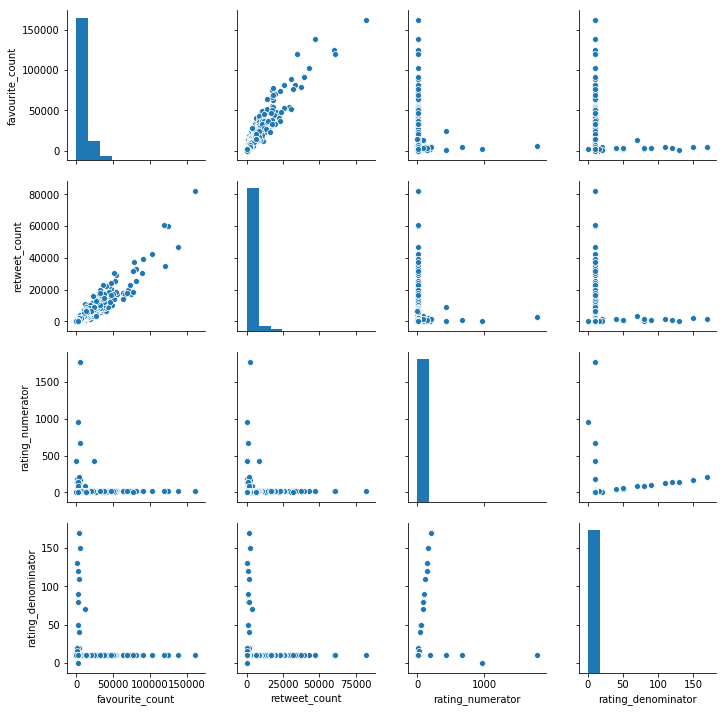

In [117]:
#let's quickly check out correlations between all popularity measures
sns.pairplot(df_like);

In [118]:
df_like.rating_numerator.value_counts().head()

12.0    499
10.0    441
11.0    426
13.0    304
9.0     157
Name: rating_numerator, dtype: int64

#### Looks there is a positive correlation between retweet_count and favourite_count (as would be expected); let's see how it looks a bit closer, and specifically, for dogs rated with most frequently used ratings, which is between 9 and 13, and visually inspect how those correlations look for each group

In [119]:
df_like_popular = df_like[(df_like.rating_numerator >= 9)&(df_like.rating_numerator <= 13)
                        &(df_like.rating_numerator != 9.5)&(df_like.rating_numerator != 9.75)]

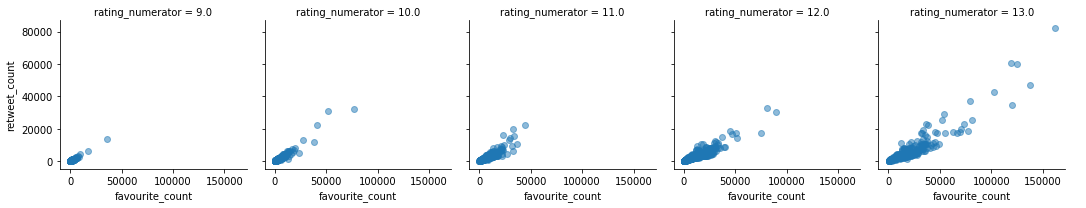

In [120]:
g = sns.FacetGrid(df_like_popular, col="rating_numerator")
g.map(plt.scatter, "favourite_count", "retweet_count", alpha=.5)
g.add_legend();

#### Conclusion
We observe a positive correlation  (between favourite and retweet counts) for each rating; and it's clear that the extreme number of favourite and retweet counts have occured mostly for higher ratings (i.e. 12.0 and 13.0 in the numerator).

#### Now let's see for each breed (we will look at 10 most popular breeds), what is the distribution of their various poularity measures (here just showing favourite counts).

In [121]:
popular_breeds = df_tweet.breed_alt1.value_counts().head(10).index
df_tweet.breed_alt1.value_counts().head(10)

golden_retriever      139
labrador_retriever     93
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
pomeranian             38
toy_poodle             38
malamute               29
Name: breed_alt1, dtype: int64

In [122]:
df_breeds = df_tweet[(df_tweet.breed_alt1.isin(popular_breeds))&(df_tweet.favourite_count<=80000)]

In [123]:
df_breeds.shape

(635, 28)

In [124]:
df_breeds.groupby(['breed_alt1'])['favourite_count'].mean().sort_values(ascending=False)

breed_alt1
samoyed               12704.025641
golden_retriever      11226.710145
pembroke              10895.409091
chow                   9564.609756
labrador_retriever     9386.467391
malamute               8305.517241
pomeranian             7715.815789
chihuahua              6926.961538
toy_poodle             6254.026316
pug                    5586.833333
Name: favourite_count, dtype: float64

In [125]:
popular_order = df_breeds.groupby(['breed_alt1'])['favourite_count'].mean().sort_values(ascending=False).index
popular_order

Index(['samoyed', 'golden_retriever', 'pembroke', 'chow', 'labrador_retriever',
       'malamute', 'pomeranian', 'chihuahua', 'toy_poodle', 'pug'],
      dtype='object', name='breed_alt1')

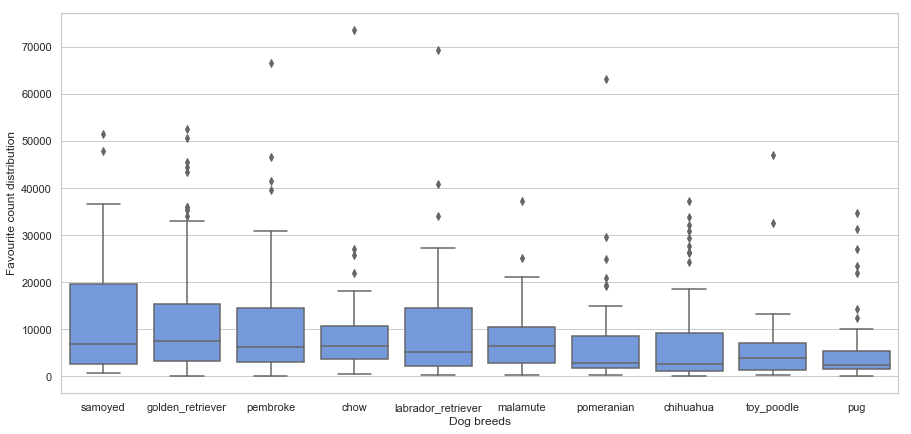

In [126]:
sns.set(style="whitegrid")
plt.figure(figsize = [15,7])
ax = sns.boxplot(x="breed_alt1", y="favourite_count", data=df_breeds, order=popular_order, color='cornflowerblue')
ax.set(xlabel='Dog breeds', ylabel='Favourite count distribution');

#### Conclusion
Samoyed breed dogs are on average most liked, while pugs are least liked, also having narrowest interquartile range

#### Now let's see for each dog stage, what is the distribution of their various poularity measures.
* This may be not perfect as each tweet may have more than one dog stage, but this is close approximation

In [127]:
dog_stages = df_tweet.dog_stages_alt1.value_counts().index
dog_stages

Index(['pupper', 'doggo', 'puppo', 'floof', 'floofer', 'blep'], dtype='object')

In [128]:
df_dog_stages = df_tweet[(df_tweet.dog_stages_alt1.notnull())&(df_tweet.favourite_count<=100000)]

In [129]:
df_dog_stages.shape

(406, 28)

In [130]:
df_dog_stages.groupby(['dog_stages_alt1'])['favourite_count'].mean().sort_values(ascending=False)

dog_stages_alt1
blep       19829.000000
puppo      16797.625000
doggo      13567.694118
floofer     9002.500000
floof       7997.034483
pupper      6312.915663
Name: favourite_count, dtype: float64

In [131]:
popular_order = df_breeds.groupby(['dog_stages_alt1'])['favourite_count'].mean().sort_values(ascending=False).index
popular_order

Index(['blep', 'doggo', 'puppo', 'floofer', 'floof', 'pupper'], dtype='object', name='dog_stages_alt1')

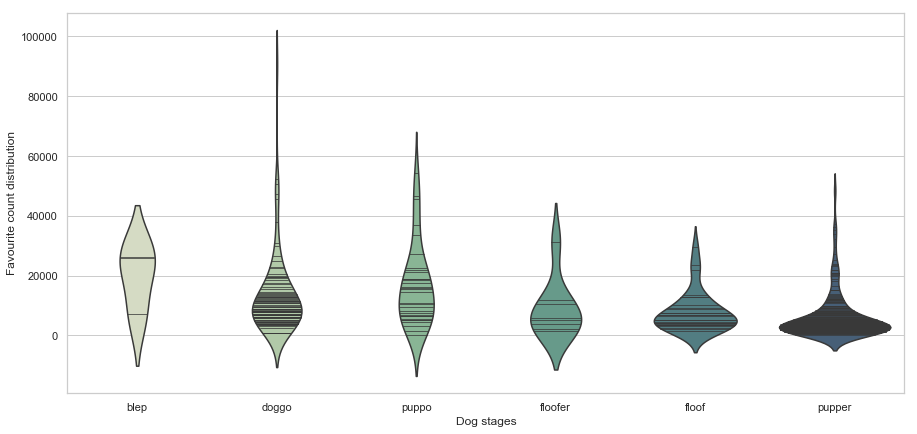

In [132]:
sns.set(style="whitegrid")
palette = sns.cubehelix_palette(8, start=.5, rot=-.75)
plt.figure(figsize = [15,7])
ax = sns.violinplot(x="dog_stages_alt1", y="favourite_count", data=df_dog_stages, order=popular_order,
                    inner="stick", palette=palette)
ax.set(xlabel='Dog stages', ylabel='Favourite count distribution');

#### Conclusion
- There are barely any bleps, but they rate high; 
- on average all dogs are liked 
- doggos have the most outliers for the better;
- puppers are most concentrated around their mean

#### Finally, let's have a look at 100 most liked dogs (by favourite count) aka Top Dogs

In [133]:
fav_index = df_tweet.favourite_count.sort_values(ascending=False).head(100).index
fav_index

Int64Index([ 858,  345,  442,  118,  897,   63,  371,  146, 1582,  102,  444,
              71, 1646,   35,  135,   39,  298,   22,  109,    7,  304,  331,
             378,  499,  702,  119,  931,   51,   53,  526,  370, 2107,  455,
              12,  205,  164,   21,  438,  747,   42,   48,  192,  105,  895,
              70,    3,   92,    4,  762,  401, 1479,  306,  322,    0, 1548,
             429, 1280,   94,  350, 1442,   44,  886,  104,  381,  136,  247,
             173,   32,  152,  494, 1426,   25, 1063,  147,   86,  178,   93,
             113,  699, 1681,  301,  359,  663,   99, 1558,   23,  207,  170,
               1,  388,  123,  115,  208,  574,   31,  621,  573,  184,  189,
               9],
           dtype='int64')

In [134]:
df_tweet.loc[fav_index].head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,...,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
858,744234799360020481,NaN,NaN,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,None,http://pbs.twimg.com/ext_tw_video_thumb/744234...,https://twitter.com/dog_rates/status/744234799...,161664.0,...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
345,822872901745569793,NaN,NaN,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,None,http://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://twitter.com/dog_rates/status/822872901...,137875.0,...,1.0,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
442,807106840509214720,NaN,NaN,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,Stephan,http://pbs.twimg.com/ext_tw_video_thumb/807106...,https://twitter.com/dog_rates/status/807106840...,124911.0,...,1.0,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
118,866450705531457537,NaN,NaN,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,Jamesy,http://pbs.twimg.com/media/DAZAUfBXYAAHtni.jpg,https://twitter.com/dog_rates/status/866450705...,120097.0,...,2.0,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
897,739238157791694849,NaN,NaN,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,None,http://pbs.twimg.com/ext_tw_video_thumb/739238...,https://twitter.com/dog_rates/status/739238157...,119452.0,...,1.0,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True


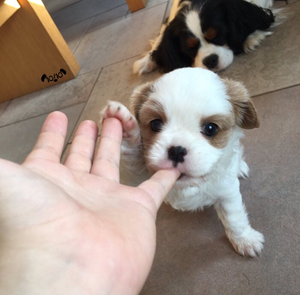

Viewer discretion advised. This is Jimbo. He will rip ur finger right h*ckin off. Other dog clearly an accessory. 12/10 pls pet with caution https://t.co/BuveP0uMF1

Favourite count: 31544
Retweet count: 6510



In [135]:
#let's disploy the image of selected Top Dog
top_dog = random.sample(list(fav_index),k=1)[0]

url = df_tweet.loc[top_dog]['dog_picture_url']
text = df_tweet.loc[top_dog]['text']
fav_count = df_tweet.loc[top_dog]['favourite_count']
retweet_count = df_tweet.loc[top_dog]['retweet_count']


r = requests.get(url)
basewidth = 300
img = Image.open(BytesIO(r.content))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

print(text)
print()
print('Favourite count: {}\nRetweet count: {}\n'.format(int(fav_count),int(retweet_count)))